In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### 1.Download the current Covid-19 dataset WHO-COVID-19-global-data.csv from the link:
https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths

In [2]:
data=pd.read_csv('WHO-COVID-19-global-data.csv')
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


### (a) Use the available data for 2021 for Angola, to predict the number of New_cases for November 20, 2021 and November 21, 2021 for Angola.

In [3]:
data['year']=pd.DatetimeIndex(data['Date_reported']).year
data['month']=pd.DatetimeIndex(data['Date_reported']).month
data['day']=pd.DatetimeIndex(data['Date_reported']).day

In [4]:
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year,month,day
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020,1,3
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020,1,4
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1,5
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020,1,6
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...,...
162814,2021-11-15,ZW,Zimbabwe,AFRO,10,133438,1,4697,2021,11,15
162815,2021-11-16,ZW,Zimbabwe,AFRO,33,133471,0,4697,2021,11,16
162816,2021-11-17,ZW,Zimbabwe,AFRO,34,133505,1,4698,2021,11,17
162817,2021-11-18,ZW,Zimbabwe,AFRO,52,133557,1,4699,2021,11,18


### (b).extraction of the entries of the month of november for Angola

In [5]:
B=data[(data['month']==11)&(data['year']==2021)&(data['Country']=='Angola')]

In [6]:
B.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year,month,day
4103,2021-11-01,AO,Angola,AFRO,59,64433,2,1710,2021,11,1
4104,2021-11-02,AO,Angola,AFRO,25,64458,3,1713,2021,11,2
4105,2021-11-03,AO,Angola,AFRO,29,64487,0,1713,2021,11,3
4106,2021-11-04,AO,Angola,AFRO,46,64533,3,1716,2021,11,4
4107,2021-11-05,AO,Angola,AFRO,50,64583,2,1718,2021,11,5


In [7]:
#features
X=B[['day']].values
#target
y=B[['New_cases']].values

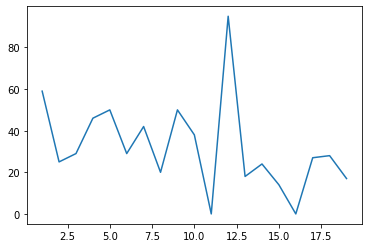

In [8]:
plt.plot(X,y)
plt.show()

### as we can see in the plot, a linear regrression will not give a good prediction of our targets then we will built a polynomial regression to predict the number of new case

In [9]:
#Fitting the Polynomial regression to the dataset  
poly_regs= PolynomialFeatures(degree= 1)  
x_poly= poly_regs.fit_transform(X)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
y_pred=lin_reg_2.predict(poly_regs.fit_transform(X_test))
y_pred

array([[30.72631579],
       [43.61052632],
       [33.58947368],
       [19.27368421]])

In [12]:
x1=np.array([[21]])
print(lin_reg_2.predict(poly_regs.fit_transform(x1)))
x2=np.array([[20]])
print(lin_reg_2.predict(poly_regs.fit_transform(x2)))

[[16.41052632]]
[[17.84210526]]


#### our model predict that on the 20 november, we will get 16 new cases and 17 the 21 november

### for all the africa country

In [40]:
C=data.groupby(['Date_reported','WHO_region']).mean()
C1=C.reset_index()

In [41]:
C1

,Date_reported,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year,month,day
0,2020-01-03,AFRO,0.000000,0.000000e+00,0.000000,0.000000,2020.0,1.0,3.0
1,2020-01-03,AMRO,0.000000,0.000000e+00,0.000000,0.000000,2020.0,1.0,3.0
2,2020-01-03,EMRO,0.000000,0.000000e+00,0.000000,0.000000,2020.0,1.0,3.0
3,2020-01-03,EURO,0.000000,0.000000e+00,0.000000,0.000000,2020.0,1.0,3.0
4,2020-01-03,Other,0.000000,0.000000e+00,0.000000,0.000000,2020.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
4804,2021-11-19,EMRO,106.045455,7.555807e+05,5.636364,13940.136364,2021.0,11.0,19.0
4805,2021-11-19,EURO,5920.758065,1.333770e+06,71.741935,24242.935484,2021.0,11.0,19.0
4806,2021-11-19,Other,0.000000,7.640000e+02,0.000000,13.000000,2021.0,11.0,19.0
4807,2021-11-19,SEARO,1690.636364,4.033499e+06,47.272727,63814.818182,2021.0,11.0,19.0


In [42]:
C2=C1[(C1['month']==11)&(C1['year']==2021)&(C1['WHO_region']=='AFRO')]

In [43]:
C2.head()

,Date_reported,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year,month,day
4676,2021-11-01,AFRO,21.56,123044.76,0.82,3013.04,2021.0,11.0,1.0
4683,2021-11-02,AFRO,38.92,123083.68,1.04,3014.08,2021.0,11.0,2.0
4690,2021-11-03,AFRO,82.16,123165.84,2.42,3016.50,2021.0,11.0,3.0
4697,2021-11-04,AFRO,51.74,123217.58,1.68,3018.18,2021.0,11.0,4.0
4704,2021-11-05,AFRO,147.90,123365.48,1.60,3019.78,2021.0,11.0,5.0


In [44]:
#features
X=C2[['day']].values
#target
y=C2[['New_deaths']].values

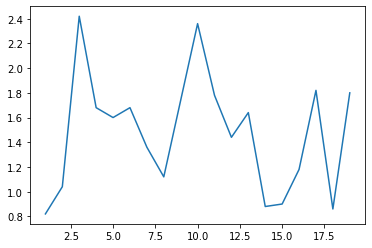

In [46]:
plt.plot(X,y)
plt.show()

In [47]:
poly_regs= PolynomialFeatures(degree= 1)  
x_poly= poly_regs.fit_transform(X)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
y_pred=lin_reg_2.predict(poly_regs.fit_transform(X_test))
y_pred

array([[1.47122807],
       [1.55017544],
       [1.48877193],
       [1.40105263]])

In [50]:
y20=lin_reg_2.predict(poly_regs.fit_transform([[20]]))
y21=lin_reg_2.predict(poly_regs.fit_transform([[21]]))

In [51]:
print(y20,y21)

[[1.3922807]] [[1.38350877]]


##### our model predict the average of 1.39 case de 20 november and 1.38 case the 21 of november

### Question 2

### (a) Upload this data set and replace non-number data with a reasonable numerical representation

In [8]:
data=pd.read_csv('SAheart.data')
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


#### In the data, we can replace the value present and absent by: present=1 , absent=0

In [9]:
data.replace({'Present':1,'Absent':0},inplace=True)

In [11]:
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


### (b) Train a logistic regressor to tell if a patient has high risk of CHD or not.

In [12]:
X=data[['sbp','tobacco' ,'ldl' ,'adiposity' ,'famhist' 
               ,'typea' ,'obesity' ,'alcohol', 'age']].values
y=data[['chd']].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0])

### (c) Identify if the a patient with the following data is of high risk or not

In [16]:
x=np.array([133, 3.3, 4.6, 34.5,1, 52, 30, 32, 44]) 
x_pred=classifier.predict([x])
x_pred

array([0])

#### The model predict that patient with those following data is not high risk for heart cardiac

### (d) Which are the most determinant factors for heart disease?

In [17]:
data.corr()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,1.000000,0.171583,-0.044813,-0.064014,0.033851,0.019941,-0.147769,-0.026758,0.088825,-0.014064,-0.063808
sbp,0.171583,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,-0.044813,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,-0.064014,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.033851,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,0.019941,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.147769,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,-0.026758,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.088825,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,-0.014064,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973


### the most determinant factors as we can see on the above correlation table are: age, tobacco, and famhist 

### (e) Does having a family history of coronary heart disease affect a patients chance of having coronary heart disease?

we can see in the table of correlation that the correlation between family history of heart disease and the heart attack deasese is equal to 0.27 mean that if you you are from a family 
who have heart attack history, you have 27 percent to also get and heart attack